In [2]:
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Berkay\scikit_learn_data


In [3]:
data.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
data.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [5]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl

In [13]:
X = data["data"]
X.shape

(400, 4096)

In [12]:
images = data["images"]

In [15]:
y = data["target"]
y.shape

(400,)

In [632]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(X,y,images, test_size=0.30, 
                                                                               random_state=42069, stratify=y)

In [633]:
_, counts = np.unique(y_train, return_counts=True)
counts

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [634]:
from scipy.ndimage import shift
from sklearn.base import BaseEstimator, TransformerMixin

class PaddingAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if len(X.shape)==2:
            x=np.array([])
            X = X.reshape(X.shape[0],int(np.sqrt(X.shape[1])),int(np.sqrt(X.shape[1])))
            for i in range(X.shape[0]):
                x =np.append(x ,np.pad(X[i], pad_width=5, mode="constant", constant_values=0))
            return x.reshape(X.shape[0],-1)
        else:
            X = X.reshape(int(np.sqrt(X.shape[0])), int(np.sqrt(X.shape[0])))
            X = np.pad(X, pad_width=5, mode="constant", constant_values=0)
            return X.reshape(-1)

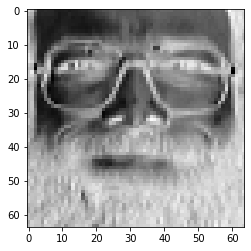

In [635]:
first = X_train[0]
first_label = y_train[0]
plt.imshow(first.reshape(64,64),cmap="binary")
pad_addr = PaddingAdder()
first_1 = pad_addr.fit_transform(first)

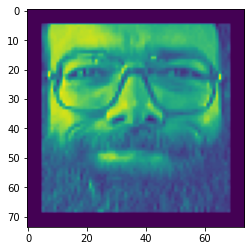

In [636]:
first_1.shape
plt.imshow(first_1.reshape(74,74))

(2, 4096)
(2, 5476)


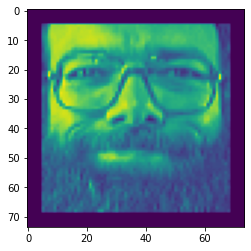

In [637]:
onetwo = X_train[:2]
onetwo_label = y_train[:2]
print(onetwo.shape)
onetwo_1 = pad_addr.fit_transform(onetwo)
print(onetwo_1.shape)
plt.imshow(onetwo_1[0].reshape(74,74))

In [638]:
def AddShift(X, y):
    if len(X.shape)==2:
        X_shaped = X.reshape(X.shape[0],int(np.sqrt(X.shape[1])),int(np.sqrt(X.shape[1])))
        x = X.copy()
        for i in range(X.shape[0]):
            x = np.r_[x,shift(X_shaped[i],shift=(1,0), mode="constant", cval=0).reshape(1,-1),
                      shift(X_shaped[i],shift=(-1,0), mode="constant", cval=0).reshape(1,-1),
                      shift(X_shaped[i],shift=(0,1), mode="constant", cval=0).reshape(1,-1),
                      shift(X_shaped[i],shift=(0,-1), mode="constant", cval=0).reshape(1,-1),
                      shift(X_shaped[i],shift=(1,1), mode="constant", cval=0).reshape(1,-1),
                      shift(X_shaped[i],shift=(1,-1), mode="constant", cval=0).reshape(1,-1),
                      shift(X_shaped[i],shift=(-1,-1), mode="constant", cval=0).reshape(1,-1),
                      shift(X_shaped[i],shift=(-1,1), mode="constant", cval=0).reshape(1,-1),]
            y = np.r_[y,np.repeat(y[i],8)]
        indices = np.random.permutation(len(y))
        
        return x[indices], y[indices]
    else:
        X_shaped = X.reshape(int(np.sqrt(X.shape[0])),int(np.sqrt(X.shape[0])))
        return np.c_[X,shift(X_shaped, shift=(3,0), mode="constant", cval=0).reshape(-1)].T, np.repeat(y,2)

In [639]:
print(AddShift(first_1,first_label)[0].shape)
print(first_label)
print(AddShift(first_1,first_label)[1])

(2, 5476)
36
[36 36]


In [640]:
print(AddShift(onetwo_1,onetwo_label)[0].shape)
print(onetwo_label)
print(AddShift(onetwo_1,onetwo_label)[1])

(18, 5476)
[36 29]
[29 36 36 29 36 29 36 36 36 36 29 29 36 29 29 29 29 36]


In [641]:
X_train.shape

(280, 4096)

In [642]:
pad_adder = PaddingAdder()

X_train_tr_1 = pad_adder.fit_transform(X_train)
X_train_tr_1.shape

(280, 5476)

In [643]:
X_train_prep, y_train_prep  = AddShift(X_train_tr_1, y_train)

In [644]:
X_train_prep.shape

(2520, 5476)

In [645]:
y_train_prep.shape

(2520,)

12


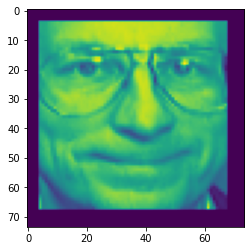

In [646]:
print(y_train_prep[4])
plt.imshow(X_train_prep[4].reshape(74,74))


(array([ 10,  77, 128, 137, 162, 183, 236], dtype=int64),)
15


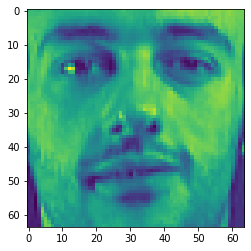

In [647]:
print(np.where(y_train==20))
print(y_train[35])
plt.imshow(X_train[35].reshape(64,64))

In [648]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()


In [649]:
knn_predict = cross_val_predict(knn_clf, X_train_prep, y_train_prep, cv=5, method="predict")

In [650]:
print("Accuracy: ",accuracy_score(y_train_prep, knn_predict))
print("Precision: ",precision_score(y_train_prep, knn_predict, average="macro"))
print("Recall: ",recall_score(y_train_prep, knn_predict, average="macro"))
print("F1: ",f1_score(y_train_prep, knn_predict, average="macro"))

Accuracy:  0.9567460317460318
Precision:  0.9603371951345796
Recall:  0.9567460317460318
F1:  0.9566552076753482


In [651]:
from sklearn.ensemble import RandomForestClassifier

for_clf = RandomForestClassifier(random_state=42069)

In [652]:
for_predict = cross_val_predict(for_clf, X_train_prep, y_train_prep, cv=5, method="predict")

In [653]:
print("Accuracy: ",accuracy_score(y_train_prep, for_predict))
print("Precision: ",precision_score(y_train_prep, for_predict, average="macro"))
print("Recall: ",recall_score(y_train_prep, for_predict, average="macro"))
print("F1: ",f1_score(y_train_prep, for_predict, average="macro"))

Accuracy:  0.9996031746031746
Precision:  0.999609375
Recall:  0.9996031746031747
F1:  0.9996031496062991


In [654]:
for_clf.fit(X_train_prep, y_train_prep)

RandomForestClassifier(random_state=42069)

In [655]:
X_test_prep = pad_adder.transform(X_test)

In [656]:
test_predictions = for_clf.predict(X_test_prep)

In [657]:
print("Accuracy: ",accuracy_score(y_test, test_predictions))
print("Precision: ",precision_score(y_test, test_predictions, average="macro"))
print("Recall: ",recall_score(y_test, test_predictions, average="macro"))
print("F1: ",f1_score(y_test, test_predictions, average="macro"))

Accuracy:  0.9416666666666667
Precision:  0.9545833333333332
Recall:  0.9416666666666667
F1:  0.9388690476190475


In [629]:
for i in range(X_test.shape[0]):
    for j in range(X_train.shape[0]):
        if (np.array_equal(X_test[i],X_train[i])==True):
            print("match",i,j)

In [630]:
X_test.shape

(100, 4096)

In [631]:
X_train.shape

(300, 4096)

In [ ]:
for_clf.

In [451]:
# from scipy.ndimage import shift

# class ShiftAdder(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         return None
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X, y=None):
#         if len(X.shape)==2:
#             X_shaped = X.reshape(X.shape[0],int(np.sqrt(X.shape[1])),int(np.sqrt(X.shape[1])))
#             x = X.copy()
#             for i in range(X.shape[0]):
#                 x = np.r_[x,shift(X_shaped[i],shift=(3,0), mode="constant", cval=0).reshape(1,-1)]
#                 y = np.append(y,y[i])
#             return x, y
#         else:
#             X_shaped = X.reshape(int(np.sqrt(X.shape[0])),int(np.sqrt(X.shape[0])))
#             return np.c_[X,shift(X_shaped, shift=(3,0), mode="constant", cval=0).reshape(-1)].T, [y,y]




                        ########## WARNING ###################
#         Unfortunately this class doesn't work as custom transformers in sklearn cannot change y

In [452]:
sft_addr = ShiftAdder()

In [453]:
first_label

33

In [454]:

first_2, first_2_label = sft_addr.fit_transform(X=first_1, y=first_label)
print(first_2.shape)
print(first_2_label)
print(first_label)


(2, 5476)
[None, None]
33


In [432]:
plt.imshow(first_2[0].reshape(74,74))

ValueError: cannot reshape array of size 10952 into shape (74,74)

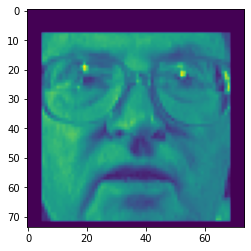

In [368]:
plt.imshow(first_2[1].reshape(74,74))

In [369]:
onetwo_2 = sft_addr.fit_transform(onetwo_1)
onetwo_2.shape

(4, 5476)

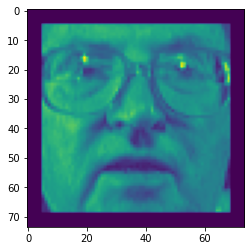

In [370]:
plt.imshow(onetwo_2[0].reshape(74,74))

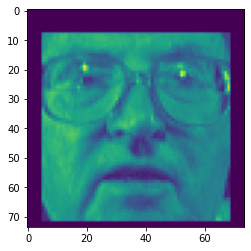

In [371]:
plt.imshow(onetwo_2[2].reshape(74,74))

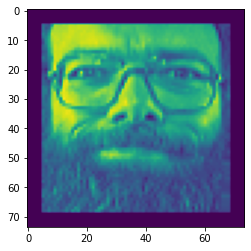

In [372]:
plt.imshow(onetwo_2[1].reshape(74,74))

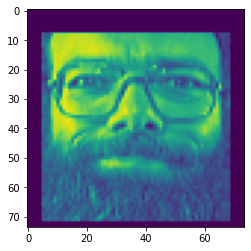

In [373]:
plt.imshow(onetwo_2[3].reshape(74,74))

In [374]:
X_train.shape

(300, 4096)

In [375]:
X_train_1 = pad_addr.fit_transform(X_train)
X_train_1.shape

(300, 5476)

In [376]:
X_train_2 = sft_addr.fit_transform(X_train_1)
X_train_2.shape

(600, 5476)

In [377]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [378]:
knn_pred = cross_val_predict(knn_clf, X_train_2, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [600, 300]

In [48]:
from sklearn.model_selection import cross_val_predict

knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=5, method="predict")

In [69]:
import pandas as pd

knn=[]

In [70]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [71]:
knn.append(accuracy_score(y_train, knn_pred))
knn.append(f1_score(y_train, knn_pred, average="macro"))
knn.append(precision_score(y_train, knn_pred, average="macro"))
knn.append(recall_score(y_train, knn_pred, average="macro"))
knn

[0.7666666666666667, 0.7538992055416204, 0.8143470418470418, 0.7625]

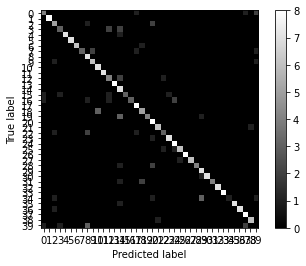

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn_conf = confusion_matrix(y_train, knn_pred)
knn_disp = ConfusionMatrixDisplay(knn_conf)
knn_disp.plot(cmap="gray", include_values=False)

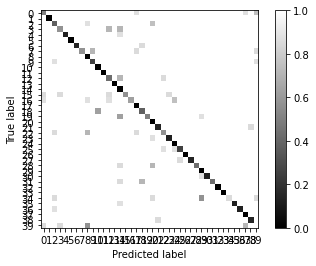

In [110]:
knn_row_sums = np.sum(knn_conf,axis=1, keepdims=True)
knn_conf_err = (knn_row_sums - knn_conf)/knn_row_sums
#np.fill_diagonal(knn_conf_err, 0)
knn_conf_err
knn_disp_err = ConfusionMatrixDisplay(knn_conf_err)
knn_disp_err.plot(cmap="gray", include_values=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnf_clf = RandomForestClassifier()